<a href="https://colab.research.google.com/github/RyanDDo/Project/blob/Project/Churn%20Customer%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

>IMPORT DATA

In [ ]:
data = "https://drive.google.com/file/d/1cXuSBUKqOAdO7BKTYuEdN0VwxmF53kUX/view?usp=sharing"

id = data.split('/')[-2]
df = pd.read_csv(f"https://drive.google.com/uc?export=download&id={id}")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0,1,1,1,10134888,1
1,15647311,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,15619304,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,15701354,699,France,Female,39,1,0,2,0,0,9382663,0
4,15737888,850,Spain,Female,43,2,12551082,1,1,1,790841,0


## Preprocessing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   credit_score      10000 non-null  int64 
 2   country           10000 non-null  object
 3   gender            10000 non-null  object
 4   age               10000 non-null  int64 
 5   tenure            10000 non-null  int64 
 6   balance           10000 non-null  int64 
 7   products_number   10000 non-null  int64 
 8   credit_card       10000 non-null  int64 
 9   active_member     10000 non-null  int64 
 10  estimated_salary  10000 non-null  int64 
 11  churn             10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,6.980471e+06,1.530200,0.70550,0.515100,9.089385e+06,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,6.285896e+06,0.581654,0.45584,0.499797,6.128208e+06,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000,5.230000e+02,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000e+00,1.000000,0.00000,0.000000,3.336751e+06,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,8.668510e+06,1.000000,1.00000,1.000000,8.890572e+06,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,1.246215e+07,2.000000,1.00000,1.000000,1.439529e+07,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,2.508981e+07,4.000000,1.00000,1.000000,1.999925e+07,1.000000


Có sự chênh lệch lớn giữa giá trị của các cột estimated_salary và balance với các cột còn lại (không tính cột customer ID)

Std của estimated_salary và balance lớn

=> Nên scale dữ liệu


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
# Xóa cột customer ID vì không sử dụng để phân tích và không ảnh hưởng đến dữ liệu
df=df.drop(labels=['customer_id'],axis=1)
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0,1,1,1,10134888,1
1,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,699,France,Female,39,1,0,2,0,0,9382663,0
4,850,Spain,Female,43,2,12551082,1,1,1,790841,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0,2,1,0,9627064,0
9996,516,France,Male,35,10,5736961,1,1,1,10169977,0
9997,709,France,Female,36,7,0,1,0,1,4208558,1
9998,772,Germany,Male,42,3,7507531,2,1,0,9288852,1


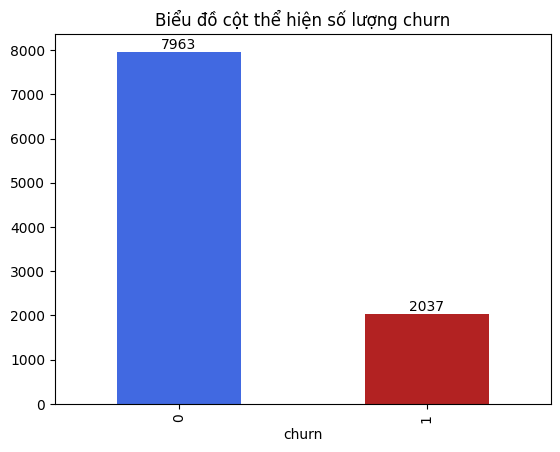

In [ ]:
df.value_counts(df.churn).plot.bar()
plt.title('Biểu đồ cột thể hiện số lượng churn')
ax =df.value_counts(df.churn).plot(kind='bar', color=['royalblue', 'firebrick'])
for i, v in enumerate(df.value_counts(df.churn)):
    ax.text(i, v, str(v), ha='center', va='bottom')

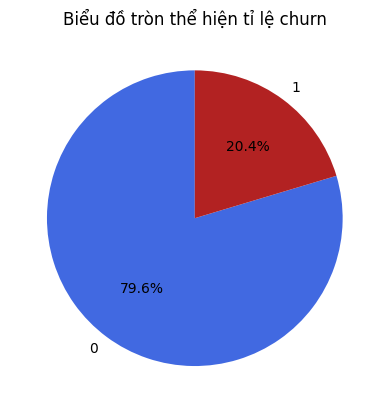

In [ ]:
churn_counts = df['churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['royalblue', 'firebrick'])
plt.title('Biểu đồ tròn thể hiện tỉ lệ churn')
plt.show()

## EDA

In [ ]:
corr = df.drop(labels=['country','gender'],axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006832,0.012238,-0.005458,0.025651,-0.000610,-0.027094
age,-0.003965,1.000000,-0.009997,0.021754,-0.030680,-0.011721,0.085472,-0.015276,0.285323
tenure,0.000842,-0.009997,1.000000,-0.016583,0.013444,0.022583,-0.028362,0.005657,-0.014001
balance,0.006832,0.021754,-0.016583,1.000000,-0.276422,-0.011052,-0.010606,0.006023,0.105839
products_number,0.012238,-0.030680,0.013444,-0.276422,1.000000,0.003183,0.009612,0.013571,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.011052,0.003183,1.000000,-0.011866,-0.006261,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010606,0.009612,-0.011866,1.000000,-0.005612,-0.156128
estimated_salary,-0.000610,-0.015276,0.005657,0.006023,0.013571,-0.006261,-0.005612,1.000000,0.003151
churn,-0.027094,0.285323,-0.014001,0.105839,-0.047820,-0.007138,-0.156128,0.003151,1.000000


In [ ]:
# Chúng ta có thể thấy rằng biến tuổi và số dư có tương quan dương với nhãn trong khi biến active_member có tương quan âm. Các biến còn lại có tương quan yếu với nhãn
# Độ tuổi là biến có tương quan lớn nhất đến sự rời bỏ của khách hàng  (0.285)

In [ ]:
df["churn"][df["churn"]==0].groupby(by=df["gender"]).count()

gender
Female    3404
Male      4559
Name: churn, dtype: int64

In [ ]:
df["churn"][df["churn"]==1].groupby(by=df["gender"]).count()

gender
Female    1139
Male       898
Name: churn, dtype: int64

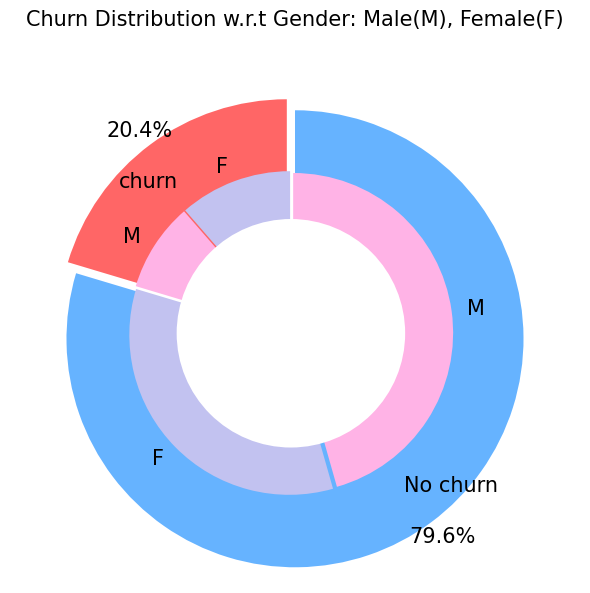

In [ ]:

plt.figure(figsize=(6, 6))
labels =["churn","No churn"]
values = [2037,7963]
labels_gender = ["F","M","F","M"]
sizes_gender = [1139,898 , 3404,4559]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

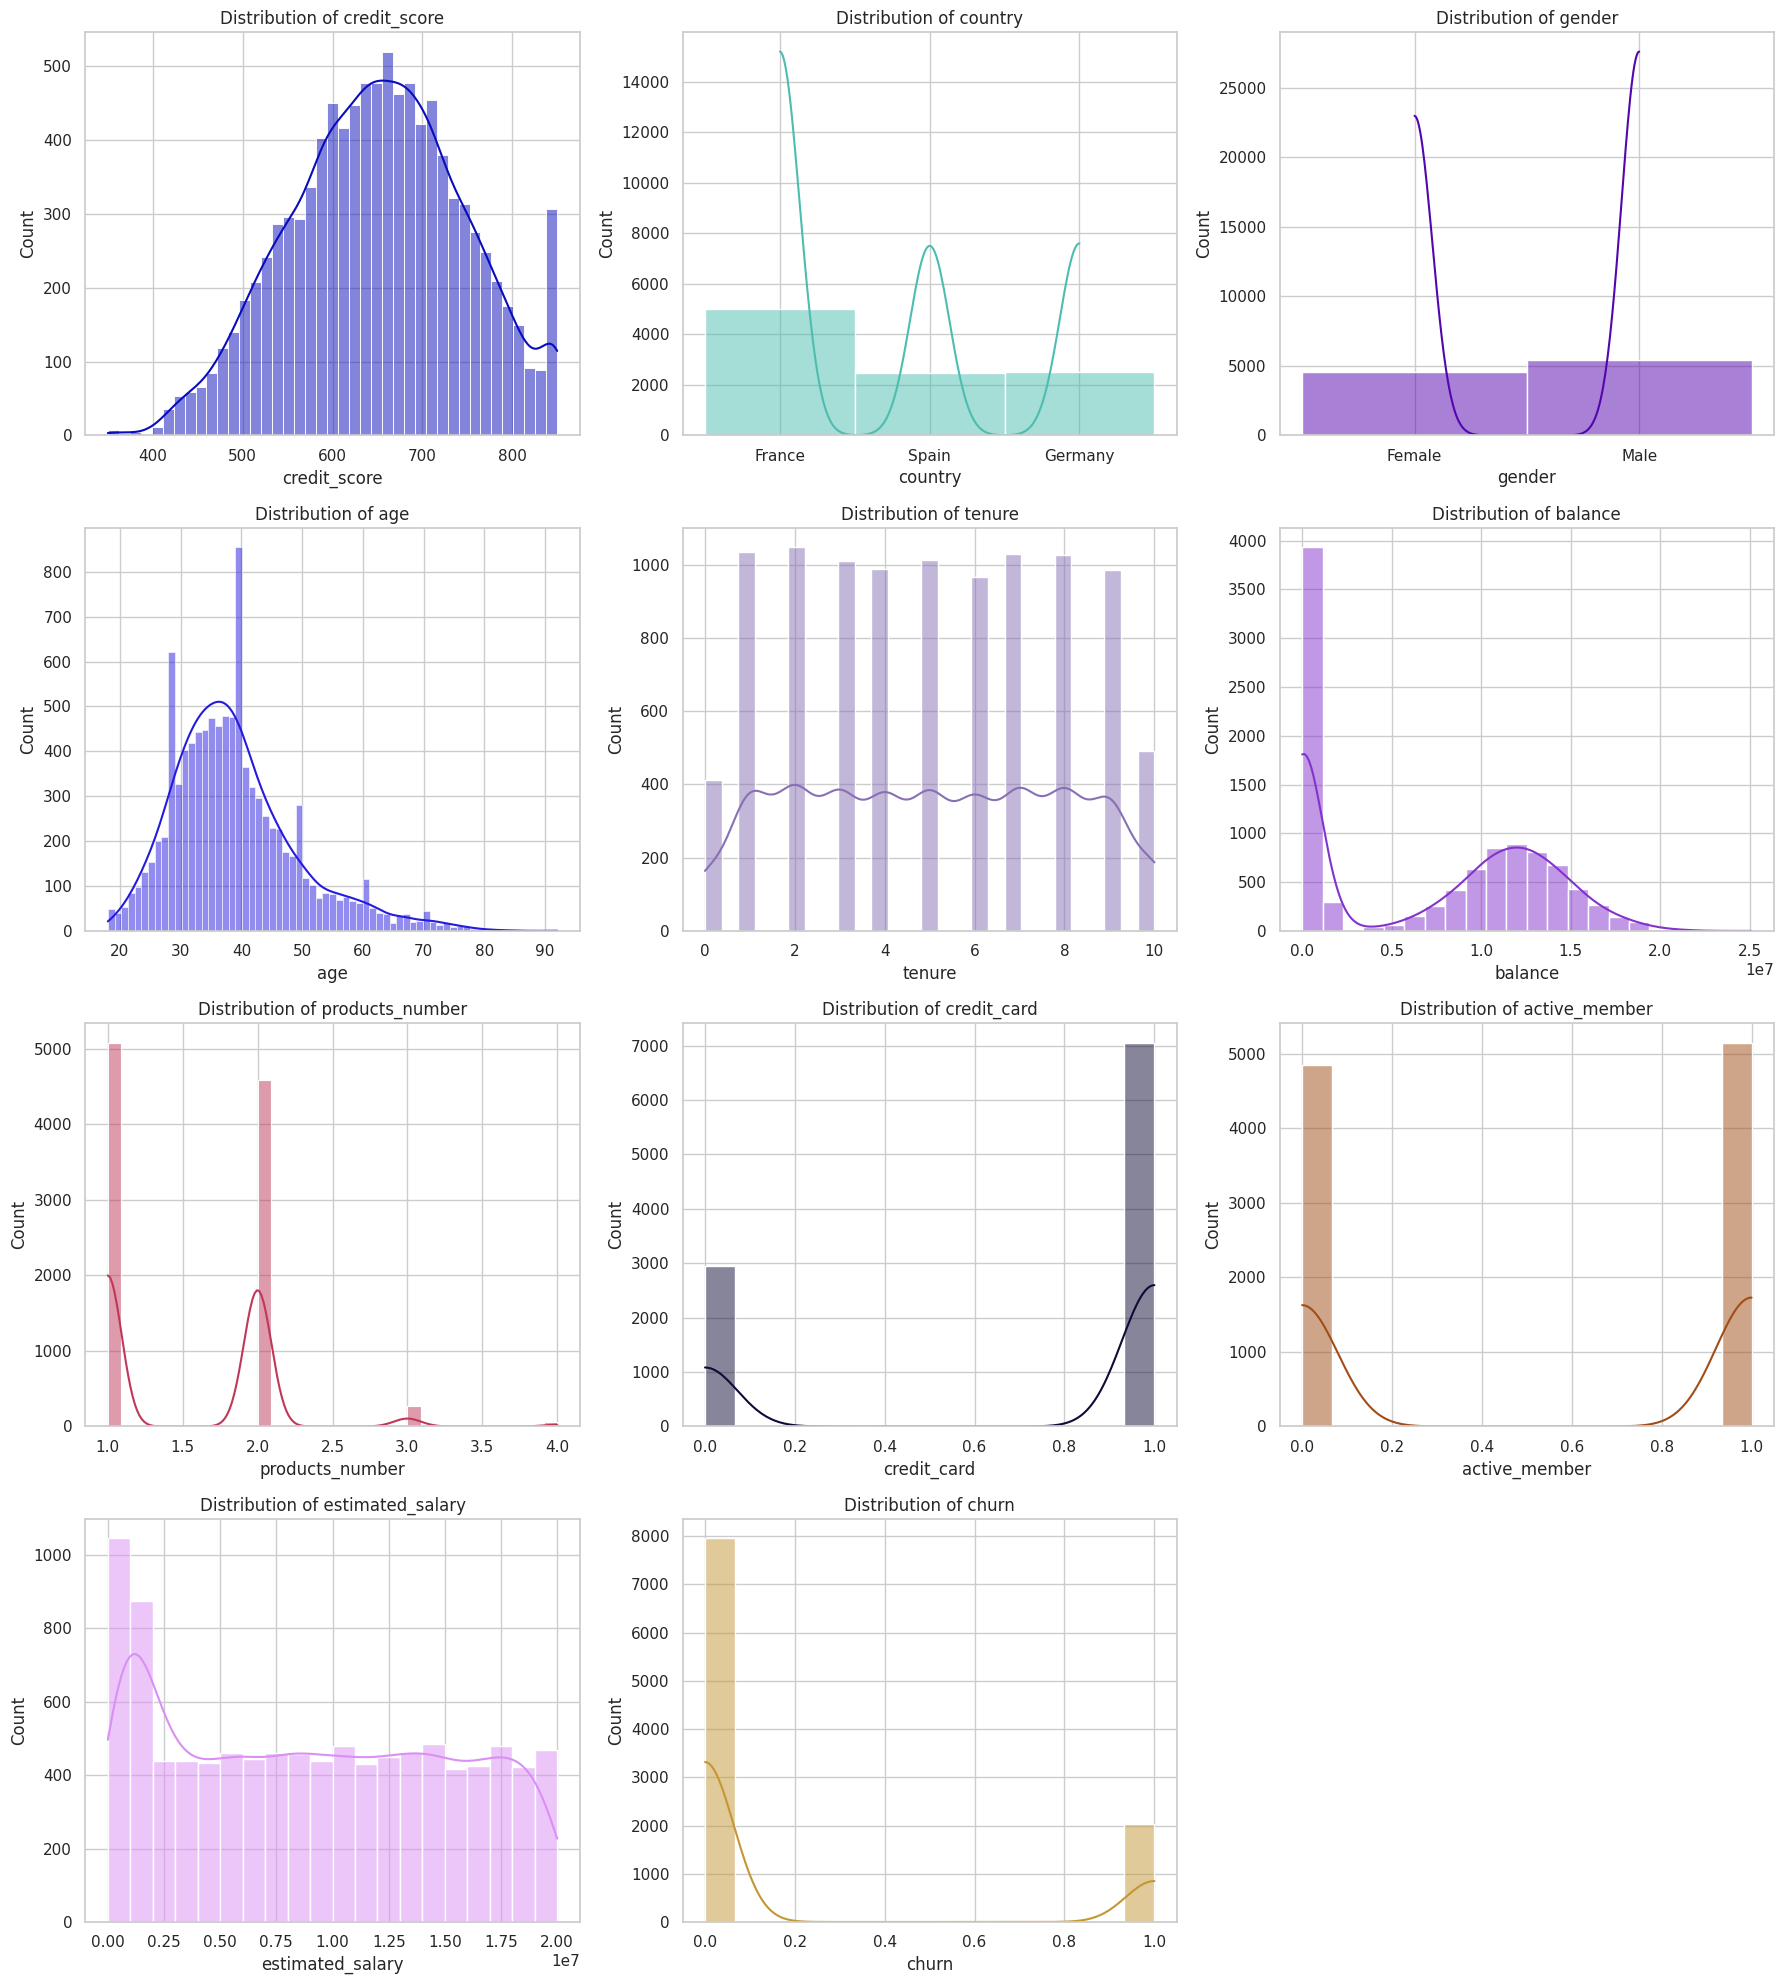

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Number of columns to plot
num_columns = len(df.columns)
rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calculate needed rows of subplots

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))  # Adjust size as needed
axes = axes.flatten()  # Flatten if more than one row

# Loop through the DataFrame columns
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color=np.random.rand(3,))
    axes[i].set_title(f'Distribution of {col}')

# Turn off any unused subplots
for ax in axes[num_columns:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Feature Relationship')

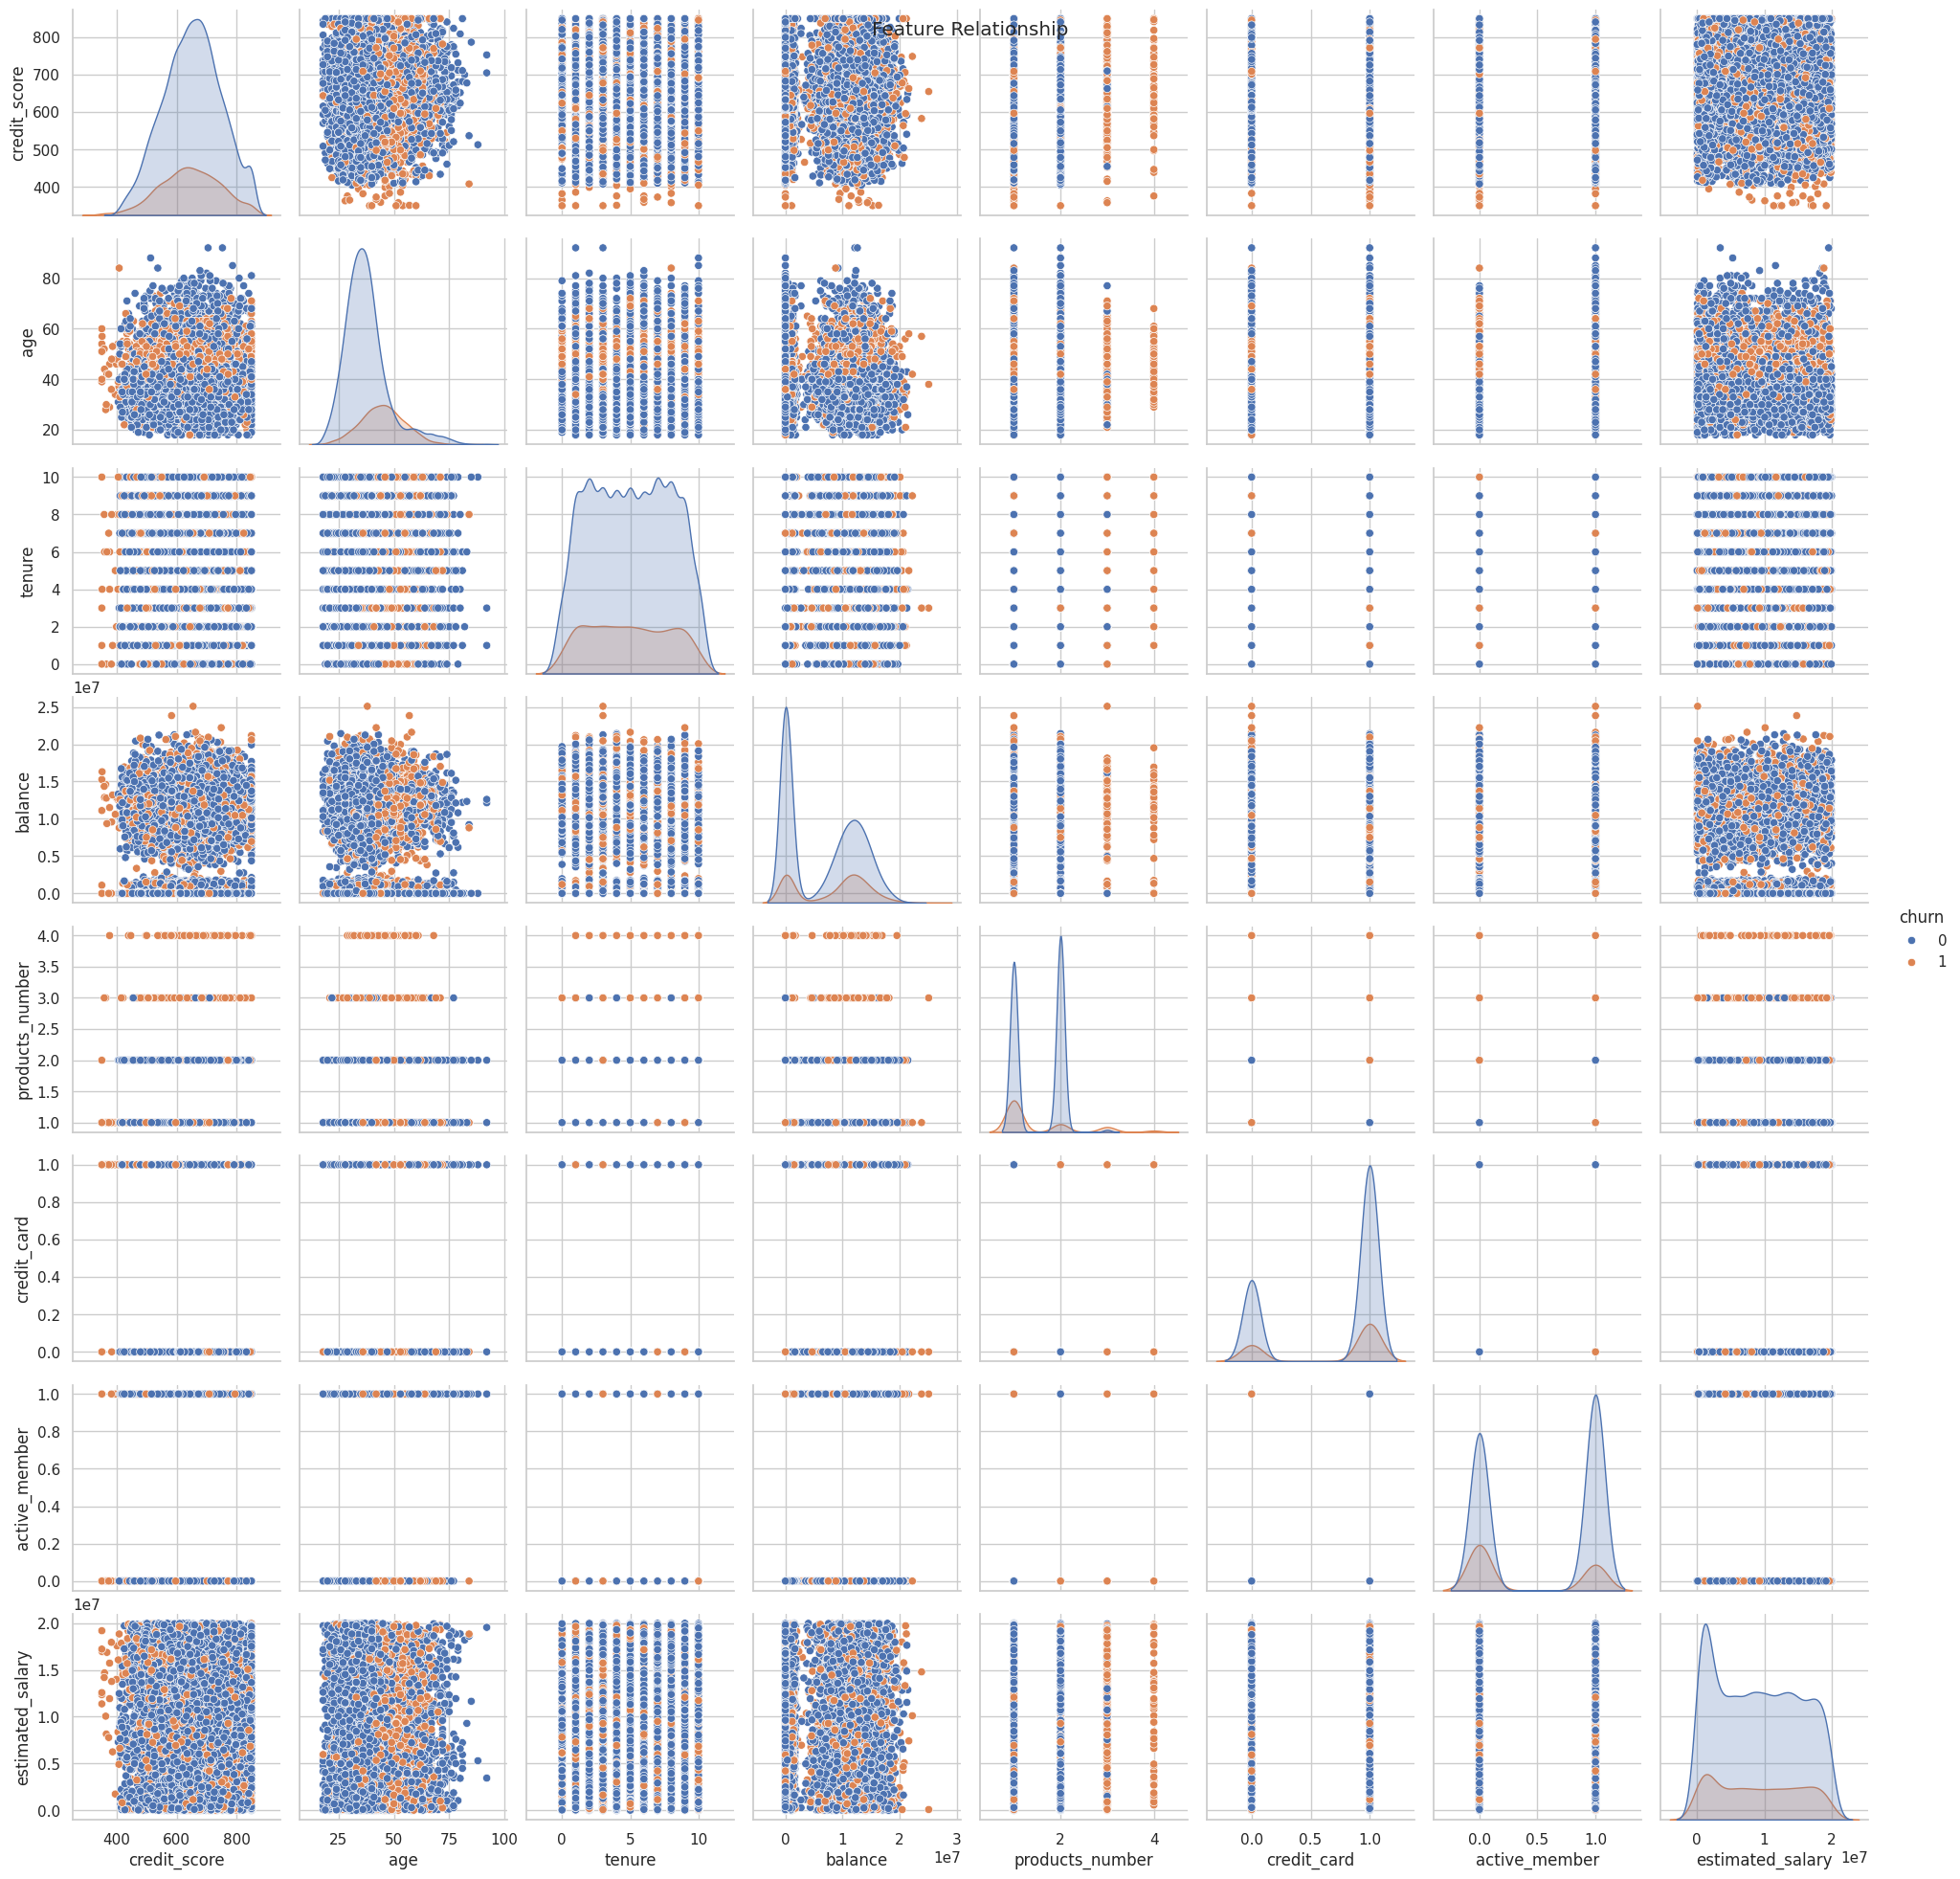

In [ ]:
plot = sns.pairplot(df, hue='churn')
plot.fig.suptitle('Feature Relationship')

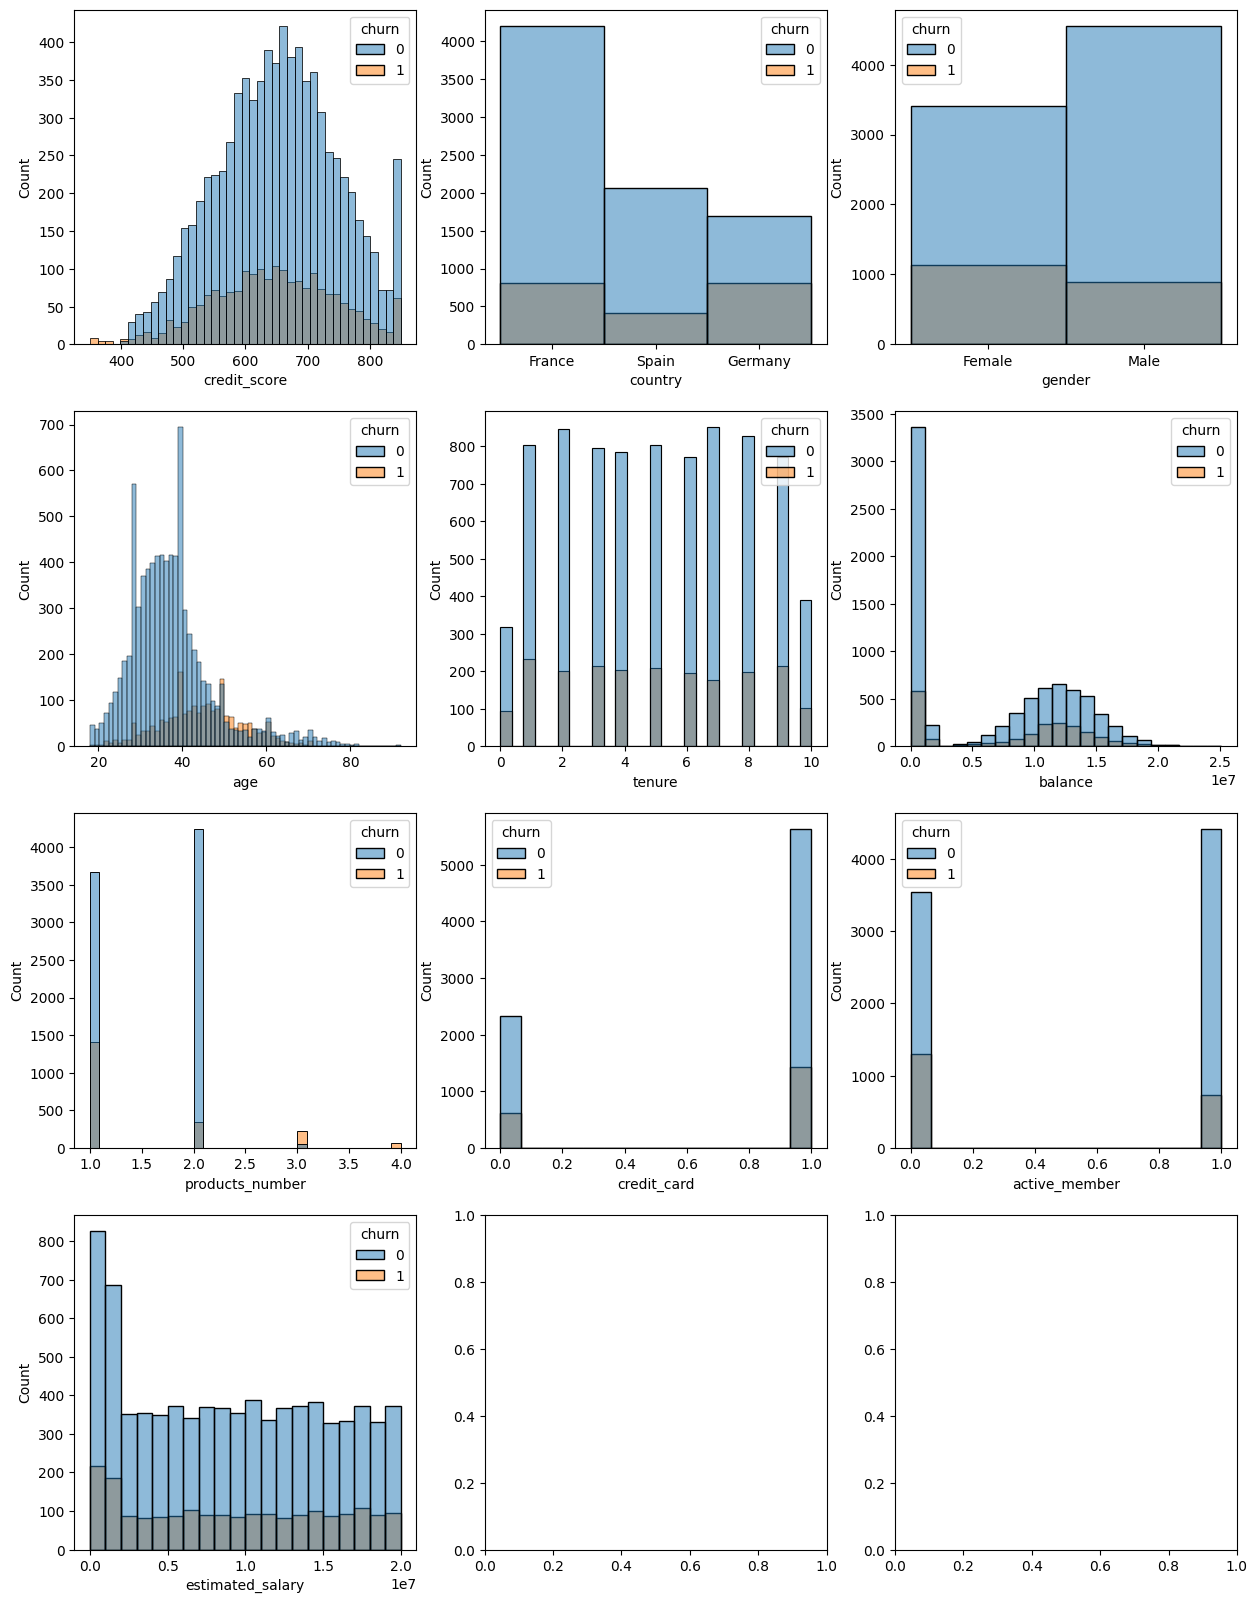

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(df.columns)-1):
    sns.histplot(data=df, x=df.columns[i],hue="churn",ax=axs[i])

<ipython-input-21-6eed4b3cae93>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.credit_score[(df["churn"] == 0  ) ],
<ipython-input-21-6eed4b3cae93>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.credit_score[(df["churn"] == 1) ],


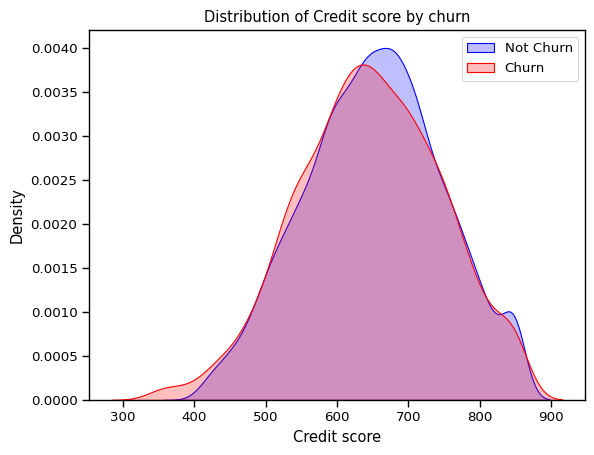

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.credit_score[(df["churn"] == 0  ) ],
                color="Blue", shade = True);
ax = sns.kdeplot(df.credit_score[(df["churn"] == 1) ],
                ax =ax, color="Red", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Credit score');
ax.set_title('Distribution of Credit score by churn');

Khách hàng có Credit_score dưới 400 có tỷ lệ churn gần như 100%

Khách hàng có Credit_score từ 650 đến 750 có tỉ lệ churn thấp hơn

<ipython-input-25-02b197bbe154>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.products_number[(df["churn"] == 0  ) ],
<ipython-input-25-02b197bbe154>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.products_number[(df["churn"] == 1) ],


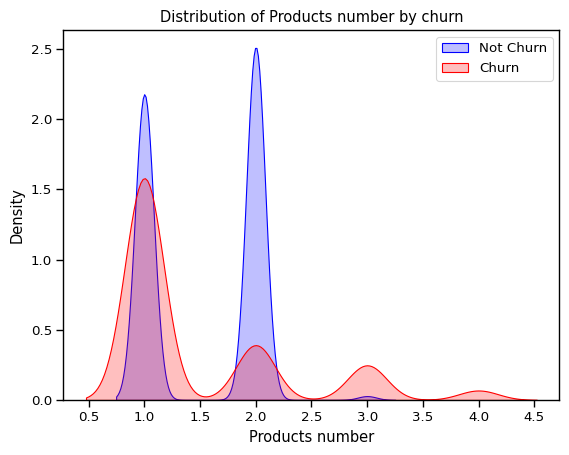

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.products_number[(df["churn"] == 0  ) ],
                color="Blue", shade = True);
ax = sns.kdeplot(df.products_number[(df["churn"] == 1) ],
                ax =ax, color="Red", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Products number');
ax.set_title('Distribution of Products number by churn');

Những người sử dụng 3 sản phẩm trở lên, có khả năng rời đi (churn) cao hơn.

Những người sử dụng 1 hoặc 2, có khả năng rời đi (churn) thấp hơn.

<ipython-input-31-1186d8137646>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.age[(df["churn"] == 0  ) ],
<ipython-input-31-1186d8137646>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.age[(df["churn"] == 1) ],


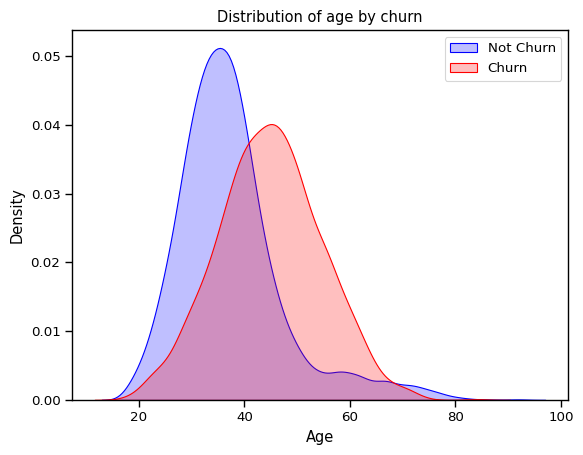

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.age[(df["churn"] == 0  ) ],
                color="Blue", shade = True);
ax = sns.kdeplot(df.age[(df["churn"] == 1) ],
                ax =ax, color="Red", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Age');
ax.set_title('Distribution of age by churn');

Những người có độ tuổi từ 40 - 70, có khả năng rời đi (churn) cao hơn.

Những người có độ tuổi từ 40 đổ xuống, có khả năng rời đi (churn) thấp hơn.

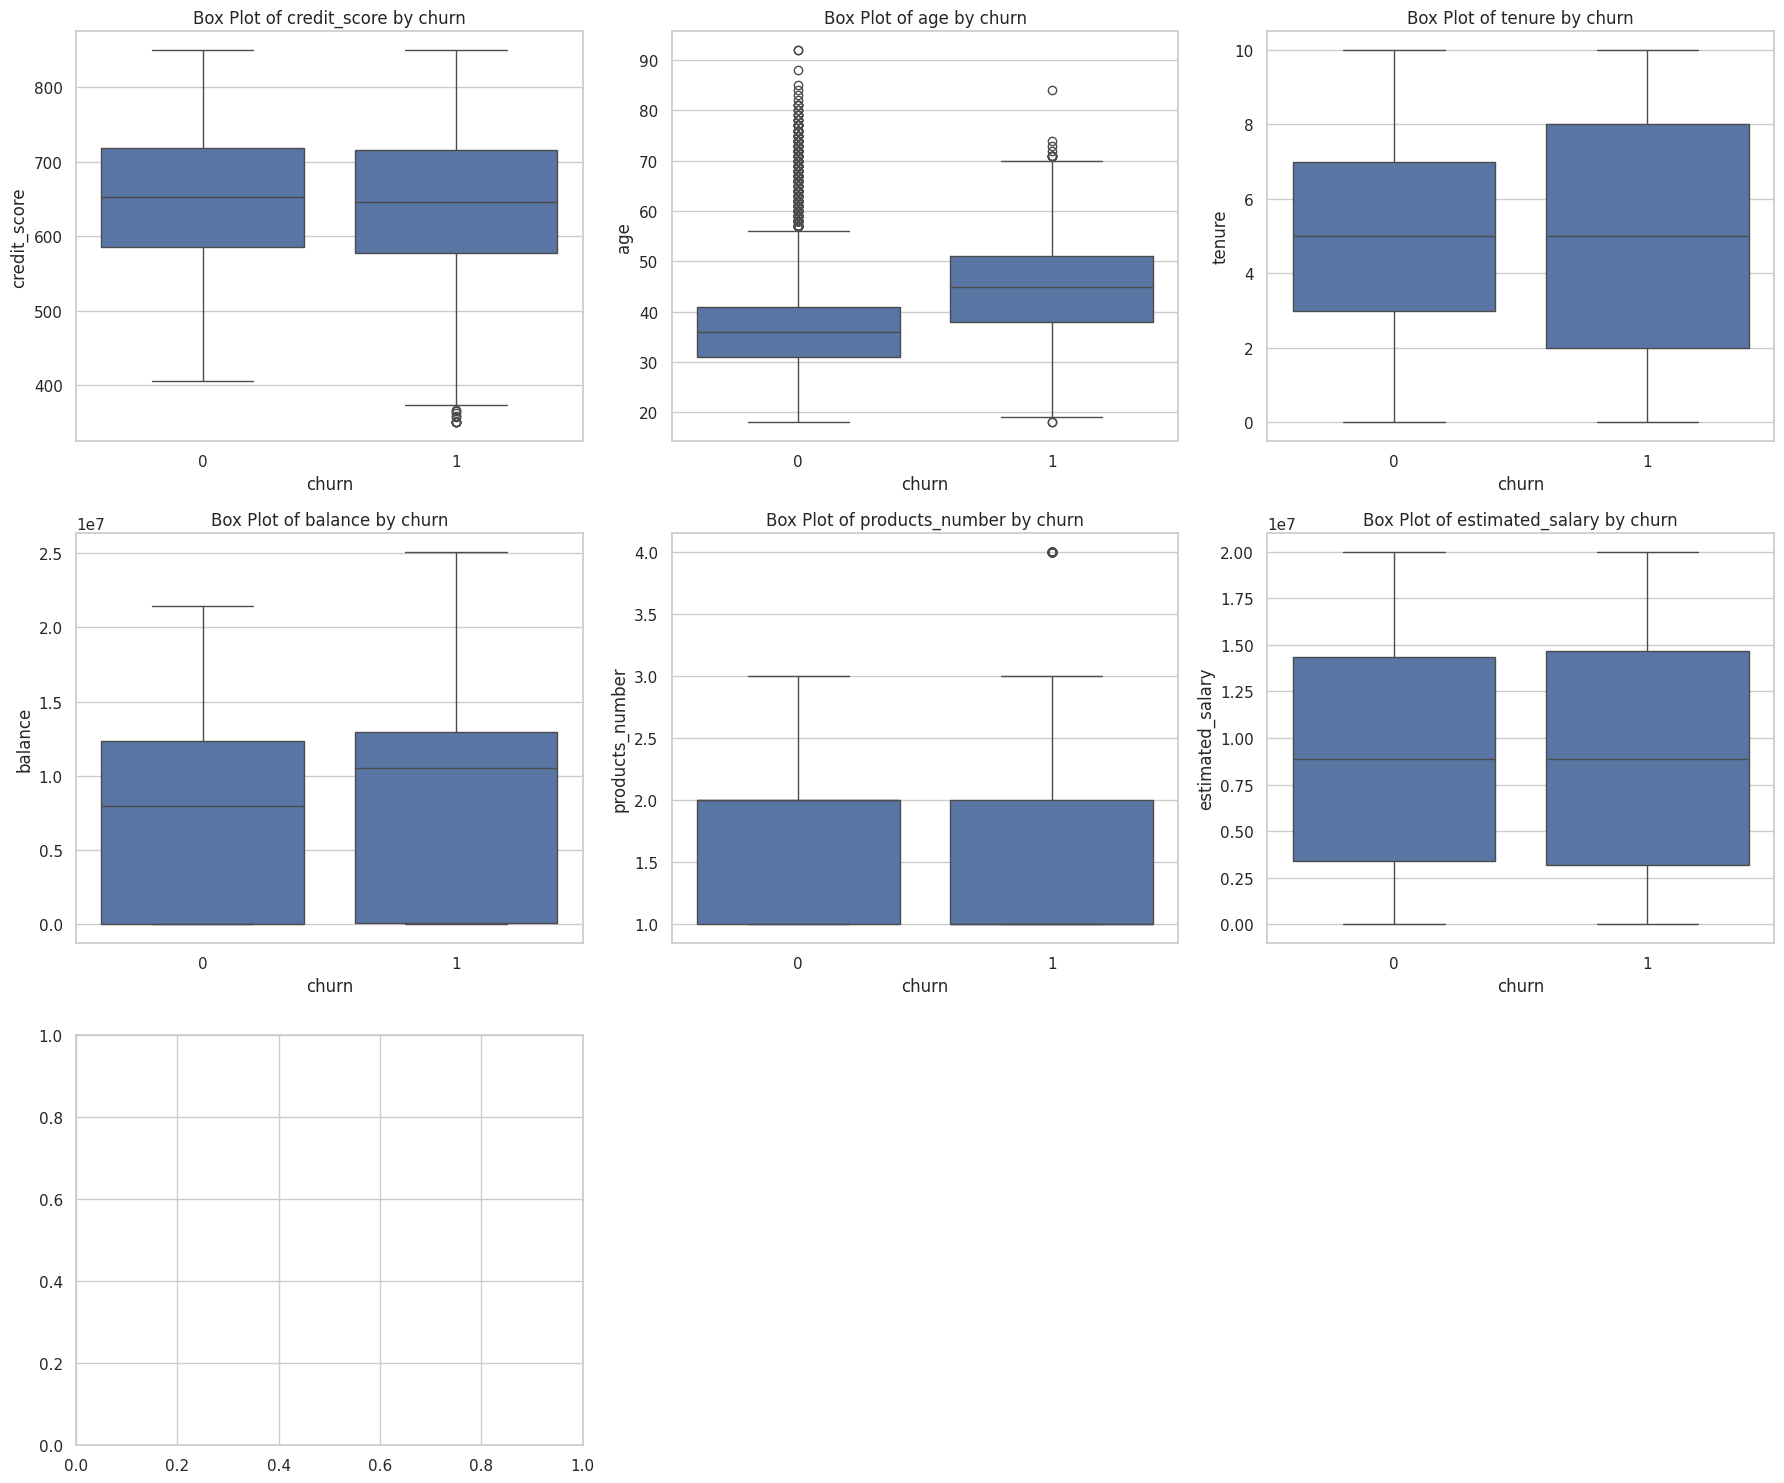

In [ ]:
df1 = df.drop(labels=['country','gender','credit_card','active_member'],axis=1)
num_columns = len(df1.columns)
rows = (num_columns // 3) + (num_columns % 3 > 0)

# Tạo figure và grid của subplots
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))
axes = axes.flatten()

# Lặp qua từng cột trong DataFrame
for i, col in enumerate(df1.columns):
    if col != 'churn':  # Bỏ qua cột mà bạn muốn phân nhóm
        # Vẽ boxplot dựa trên giá trị của cột 'column_to_group_by'
        sns.boxplot(x='churn', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Box Plot of {col} by churn')

# Ẩn các subplot dư thừa
for ax in axes[num_columns:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

##LABEL

In [ ]:
df.gender = df.gender.replace({"Male": 0, "Female": 1})
df.gender

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: gender, Length: 10000, dtype: int64

In [ ]:
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df.country = df.country.replace({"France": 0, "Spain": 1, "Germany": 2})
df.country

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    2
9999    0
Name: country, Length: 10000, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(df)
print("Min-Max Scaled df2:\n", data_min_max_scaled)

Min-Max Scaled df2:
 [[0.538      0.         1.         ... 1.         0.50675056 1.        ]
 [0.516      0.5        1.         ... 1.         0.56272262 0.        ]
 [0.304      0.         1.         ... 0.         0.56966802 1.        ]
 ...
 [0.718      0.         1.         ... 1.         0.21041516 1.        ]
 [0.844      1.         0.         ... 0.         0.46444606 1.        ]
 [0.884      0.         1.         ... 0.         0.19093992 0.        ]]


> SCALE

In [ ]:
scaled_df=pd.DataFrame(data_min_max_scaled,columns=df.columns)
scaled_df.describe()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.374750,0.454300,0.282727,0.501280,0.278219,0.176733,0.70550,0.515100,0.454472,0.203700
std,0.193307,0.415216,0.497932,0.141727,0.289217,0.250536,0.193885,0.45584,0.499797,0.306430,0.402769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.000000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.166822,0.000000
50%,0.604000,0.000000,0.000000,0.256757,0.500000,0.345499,0.000000,1.00000,1.000000,0.444531,0.000000
75%,0.736000,1.000000,1.000000,0.351351,0.700000,0.496702,0.333333,1.00000,1.000000,0.719784,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
x= scaled_df[['credit_score','country','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']]
y = scaled_df['churn']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

>  HANDLE IMBALANCE

In [ ]:
df_churn_xtrain = x_train[y_train == 1]
df_churn_xtrain

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1670,0.418,0.5,0.0,0.081081,0.3,0.457317,0.000000,1.0,0.0,0.429456
6087,0.422,0.0,1.0,0.121622,0.9,0.005406,0.000000,1.0,0.0,0.076519
6669,0.334,0.0,0.0,0.513514,0.9,0.566554,0.000000,0.0,0.0,0.197427
5933,0.438,0.0,0.0,0.310811,0.4,0.479252,0.000000,1.0,0.0,0.815776
5866,0.770,0.0,1.0,0.472973,0.8,0.493608,0.333333,0.0,1.0,0.852303
...,...,...,...,...,...,...,...,...,...,...
4555,0.676,0.5,1.0,0.229730,0.6,0.000000,0.000000,1.0,0.0,0.127424
769,0.362,0.0,1.0,0.608108,0.1,0.457220,0.000000,0.0,1.0,0.122516
1685,0.526,1.0,1.0,0.027027,0.0,0.467744,0.000000,0.0,0.0,0.056756
5390,0.770,0.0,1.0,0.270270,0.1,0.000000,0.666667,0.0,0.0,0.461104


In [ ]:
df_nochurn_xtrain = x_train[y_train == 0]
df_nochurn_xtrain

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9254,0.672,0.0,0.0,0.189189,0.6,0.000000,0.333333,1.0,1.0,0.895497
1561,0.564,1.0,0.0,0.324324,0.4,0.047679,0.333333,1.0,1.0,0.979931
8829,0.666,0.0,1.0,0.297297,0.1,0.000000,0.333333,0.0,0.0,0.003762
7945,0.818,0.0,1.0,0.364865,0.8,0.000000,0.333333,1.0,1.0,0.496262
3508,0.152,0.0,1.0,0.216216,0.3,0.000000,0.333333,1.0,1.0,0.306148
...,...,...,...,...,...,...,...,...,...,...
466,1.000,0.5,1.0,0.189189,0.9,0.000000,0.333333,1.0,1.0,0.094604
6265,1.000,0.0,0.0,0.256757,0.6,0.000000,0.333333,1.0,0.0,0.546465
5734,0.836,0.0,0.0,0.486486,0.8,0.277853,0.000000,1.0,1.0,0.346901
5191,0.664,0.0,1.0,0.540541,0.1,0.000000,0.000000,1.0,1.0,0.000327


In [ ]:
oversampling_churn_xtrain = df_churn_xtrain.sample(len(df_nochurn_xtrain), replace=True)
oversampling_churn_xtrain

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9997,0.718,0.0,1.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210415
7832,0.446,0.5,0.0,0.378378,0.3,0.260142,0.000000,0.0,1.0,0.949978
9744,0.472,1.0,0.0,0.378378,0.8,0.426344,0.000000,1.0,1.0,0.396834
9126,0.806,0.5,0.0,0.445946,0.4,0.318104,0.333333,0.0,1.0,0.341297
7,0.052,1.0,1.0,0.148649,0.4,0.458540,1.000000,1.0,0.0,0.596746
...,...,...,...,...,...,...,...,...,...,...
4608,1.000,1.0,0.0,0.324324,0.8,0.477643,0.000000,0.0,1.0,0.255070
475,0.542,1.0,0.0,0.378378,0.6,0.562294,0.000000,0.0,0.0,0.017265
8784,0.576,1.0,1.0,0.310811,0.9,0.575238,0.000000,1.0,0.0,0.369897
3167,0.574,0.0,1.0,0.405405,0.7,0.521355,0.333333,1.0,1.0,0.660045


In [ ]:
oversampling_churn_ytrain = y_train[oversampling_churn_xtrain.index]
oversampling_churn_ytrain

9997    1.0
7832    1.0
9744    1.0
9126    1.0
7       1.0
       ... 
4608    1.0
475     1.0
8784    1.0
3167    1.0
4332    1.0
Name: churn, Length: 6356, dtype: float64

In [ ]:
oversampling_x_train = pd.concat([df_nochurn_xtrain.reset_index(), oversampling_churn_xtrain.reset_index()], axis=0)
oversampling_x_train

,index,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,9254,0.672,0.0,0.0,0.189189,0.6,0.000000,0.333333,1.0,1.0,0.895497
1,1561,0.564,1.0,0.0,0.324324,0.4,0.047679,0.333333,1.0,1.0,0.979931
2,8829,0.666,0.0,1.0,0.297297,0.1,0.000000,0.333333,0.0,0.0,0.003762
3,7945,0.818,0.0,1.0,0.364865,0.8,0.000000,0.333333,1.0,1.0,0.496262
4,3508,0.152,0.0,1.0,0.216216,0.3,0.000000,0.333333,1.0,1.0,0.306148
...,...,...,...,...,...,...,...,...,...,...,...
6351,4608,1.000,1.0,0.0,0.324324,0.8,0.477643,0.000000,0.0,1.0,0.255070
6352,475,0.542,1.0,0.0,0.378378,0.6,0.562294,0.000000,0.0,0.0,0.017265
6353,8784,0.576,1.0,1.0,0.310811,0.9,0.575238,0.000000,1.0,0.0,0.369897
6354,3167,0.574,0.0,1.0,0.405405,0.7,0.521355,0.333333,1.0,1.0,0.660045


In [ ]:
oversampling_y_train = pd.concat([y_train[y_train == 0].reset_index(), oversampling_churn_ytrain.reset_index()], axis=0)
oversampling_y_train

,index,churn
0,9254,0.0
1,1561,0.0
2,8829,0.0
3,7945,0.0
4,3508,0.0
...,...,...
6351,4608,1.0
6352,475,1.0
6353,8784,1.0
6354,3167,1.0


In [ ]:
oversampling_x_train.drop(columns=['index'], inplace=True)
oversampling_y_train.drop(columns=['index'], inplace=True)

In [ ]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GridSearchCV(RandomForestClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
    GridSearchCV(KNeighborsClassifier(), param_grid={
        'n_neighbors': [10, 50, 100, 200],
    }),
    GridSearchCV(SVC(), param_grid={
        'C': [1, 10],
        'kernel': ['linear', 'rbf'],
    }),
    GridSearchCV(AdaBoostClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
    GridSearchCV(GradientBoostingClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
    GridSearchCV(LGBMClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
    GridSearchCV(XGBClassifier(), param_grid={
        'n_estimators': [10, 50, 100, 200],
    }),
]

> TRAIN WITH BALANCE DATA

In [ ]:
for model in models:
    _model = model
    _model.fit(oversampling_x_train, oversampling_y_train)
    pred = _model.predict(x_test)
    print('-'*10)
    print(_model)
    try:
      print(f"BEST PARAM: {_model.best_params_}")
    except:
      pass
    print(classification_report(y_test, pred))
    print('-'*10)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


----------
LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      1607
         1.0       0.37      0.70      0.49       393

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.71      0.74      2000

----------
----------
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1607
         1.0       0.48      0.52      0.50       393

    accuracy                           0.80      2000
   macro avg       0.68      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000

----------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

----------
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      1607
         1.0       0.66      0.52      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000

----------


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

----------
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 50, 100, 200]})
BEST PARAM: {'n_neighbors': 10}
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82      1607
         1.0       0.38      0.60      0.46       393

    accuracy                           0.73      2000
   macro avg       0.63      0.68      0.64      2000
weighted avg       0.79      0.73      0.75      2000

----------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

----------
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})
BEST PARAM: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85      1607
         1.0       0.45      0.72      0.55       393

    accuracy                           0.77      2000
   macro avg       0.68      0.75      0.70      2000
weighted avg       0.83      0.77      0.79      2000

----------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

----------
GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.94      0.80      0.86      1607
         1.0       0.48      0.78      0.60       393

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.79      0.81      2000

----------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

----------
GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88      1607
         1.0       0.52      0.77      0.62       393

    accuracy                           0.82      2000
   macro avg       0.73      0.80      0.75      2000
weighted avg       0.86      0.82      0.83      2000

----------
[LightGBM] [Info] Number of positive: 5085, number of negative: 5084
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 10169, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500049 -> initscore=0.000197
[LightGBM] [Info] Start training from score 0.000197
[LightGBM] [I

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Info] Number of positive: 5085, number of negative: 5085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 10170, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 5085, number of negative: 5085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 10170, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 5085, number of negative: 5084
[LightGBM] [Info] Auto-choosing col-wise multi-threading, t

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Info] Number of positive: 5084, number of negative: 5085
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 10169, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499951 -> initscore=-0.000197
[LightGBM] [Info] Start training from score -0.000197
[LightGBM] [Info] Number of positive: 5085, number of negative: 5085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 10170, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Info] Number of positive: 5085, number of negative: 5085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 10170, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 5085, number of negative: 5085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 10170, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Info] Number of positive: 5085, number of negative: 5084
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 10169, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500049 -> initscore=0.000197
[LightGBM] [Info] Start training from score 0.000197
[LightGBM] [Info] Number of positive: 5084, number of negative: 5085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 10169, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499951 -> initscore=-0.000197
[LightGBM] [Info] Start training from score -0.000197
[LightGBM] [Info] Nu

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 10170, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Number of positive: 5085, number of negative: 5085
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 10170, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 5085, number of negative: 5085
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 10170, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 5085, number of negative: 5084
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 10169, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500049 -> initscore=0.000197
[LightGBM] [Info] Start training from score 0.000197


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 5084, number of negative: 5085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 10169, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499951 -> initscore=-0.000197
[LightGBM] [Info] Start training from score -0.000197


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 5085, number of negative: 5085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 10170, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 5085, number of negative: 5085
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 10170, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 5085, number of negative: 5085
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 10170, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 6356, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 12712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
----------
GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90      1607
         1.0       0.57      0.68      0.62       393

    accuracy                           0.84      2000
   macro avg       0.74      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000

----------
----------
Gri

Với việc train mô hình với dữ liệu đã imbalance kết quả thu được là số điểm Accuracy của các mô hình dao động từ 0.71 đến 0.85

Random Forest là mô hình có số điểm Accuracy cao nhất.

Mô hình LGBMClassifier tuy có số điểm Accuracy thấp hơn (0.84 so với 0.85) nhưng lại có điểm F1-Score vượt trội

> TRAIN WITH IMBALANCE DATA

In [ ]:
for model in models:
    _model = model
    _model.fit(x_train, y_train)
    pred = _model.predict(x_test)
    print('-'*10)
    print(_model)
    try:
      print(f"BEST PARAM: {_model.best_params_}")
    except:
      pass
    print(classification_report(y_test, pred))
    print('-'*10)

----------
LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1607
         1.0       0.57      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000

----------
----------
DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1607
         1.0       0.49      0.54      0.51       393

    accuracy                           0.80      2000
   macro avg       0.69      0.70      0.69      2000
weighted avg       0.81      0.80      0.80      2000

----------
----------
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92  

Với việc train mô hình với dữ liệu không imbalance kết quả thu được là số điểm Accuracy của các mô hình dao động từ 0.80 đến 0.87

GradientBoostingClassifier là mô hình có cả số điểm Accuracy và F1-Score cao nhất.


## KẾT LUẬN

Mô hình được train với dữ liệu không balance sẽ cho kết quả chính xác hơn

Mô hình với kết quả đánh giá cao nhất là: GradientBoostingClassifier (Imbalance)